## case study for Correspondence Factorial Analysis

Pandas: is a python library that allows you to easily manipulate data to be analyzed.

numpy: is a digital library supporting efficient support of large multidimensional arrays.

matplotlib: is a Python library capable of producing quality graphs.

Seaborn: is a library which in addition to Matplotlib,it replaces some default settings and functions,while adding new features.

fanalysis: Allow factor analyzes to be carried out for descriptive purposes.

scipy: is a digital library of algorithms and mathematical functions, based on tables.

In [3]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
#in case you don't have fanalysis use :
#!pip install fanalysis
from fanalysis.ca import CA
import scipy

we load our dataset from the excel file AFC

In [4]:
D = pandas.read_excel("AFC.xlsx",sheet_name="AFC",index_col=0)
print(D);

           Droit  Science  Medecine  Iut
Exp.agri      80       99        65   58
Patron       168      137       208   62
Cadre.sup    470      400       876   79
Employe      145      133       135   54
Ouvrier      166      193       127  129


calculate row totals and column totals.

In [5]:
#calcul des totaux en ligne
tot_lig = numpy.sum(D.values,axis=1)
print(tot_lig)


#calcul des totaux en colonne
tot_col = numpy.sum(D.values,axis=0)
print(tot_col)


[ 302  575 1825  467  615]
[1029  962 1411  382]


line proportions

In [6]:
prof_lig = numpy.apply_along_axis(arr=D.values,axis=1,func1d=lambda x:x/numpy.sum(x))
print(prof_lig)

[[0.26490066 0.32781457 0.21523179 0.19205298]
 [0.29217391 0.23826087 0.36173913 0.10782609]
 [0.25753425 0.21917808 0.48       0.04328767]
 [0.31049251 0.28479657 0.28907923 0.11563169]
 [0.2699187  0.31382114 0.20650407 0.2097561 ]]


graphical representation of the choice of sectors according to the CSP - Data "CSP - Sectors.

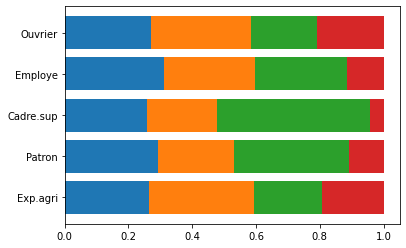

In [7]:
somme = numpy.zeros(shape=(prof_lig.shape[0]))
for i in range(prof_lig.shape[1]):
 plt.barh(range(prof_lig.shape[0]),prof_lig[:,i],left=somme)
 somme = somme + prof_lig[:,i]

plt.yticks(range(prof_lig.shape[0]),D.index)
plt.show()


We observe a clear preference of the children of “Cadres.Sup” for “Medicine”. Compared to others

categories, "workers" and "farmers" are more involved in IUT. Etc. 
The role of AFC  will highlight the differences between the profiles and identify any contacts between the CSPs and the choice of courses.

calculate the  marginal profiles.

In [8]:
prof_marg_lig = tot_col/numpy.sum(tot_col)
print(prof_marg_lig)

[0.27193446 0.25422833 0.37288584 0.10095137]


let us calculate the distance of the KHI-2 between cadre (2) and ouvrier (4).

In [9]:
print(numpy.sum((prof_lig[2,:]-prof_lig[4,:])**2/prof_marg_lig))

0.510900786777672


calculate the distance of KHI-2 between cadre (2) and patron (1).

In [10]:
print(numpy.sum((prof_lig[2,:]-prof_lig[1,:])**2/prof_marg_lig))

0.08461088232967051


calculate the distance between pairs of row modalities.

In [33]:
distPairesLig = numpy.zeros(shape=(prof_lig.shape[0],prof_lig.shape[0]))
for i in range(prof_lig.shape[0]-1):
    for j in range(0,prof_lig.shape[0]):
         distPairesLig[i,j] = numpy.sum((prof_lig[i,:]-prof_lig[j,:])**2/prof_marg_lig)

print(pandas.DataFrame(distPairesLig,index=D.index,columns=D.index))

           Exp.agri    Patron  Cadre.sup   Employe   Ouvrier
Exp.agri   0.000000  0.162117   0.453847  0.087400  0.004172
Patron     0.162117  0.000000   0.084611  0.024514  0.191823
Cadre.sup  0.453847  0.084611   0.000000  0.176847  0.510901
Employe    0.087400  0.024514   0.176847  0.000000  0.115413
Ouvrier    0.000000  0.000000   0.000000  0.000000  0.000000


display as a heatmap.
A graphic representation in the form of a "heatmap" gives an overall view of the differences.

<AxesSubplot:>

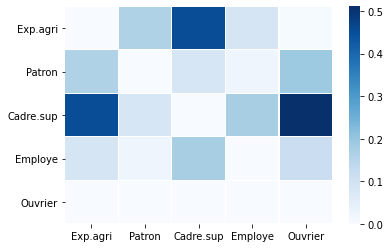

In [12]:
sns.heatmap(distPairesLig,vmin=0,vmax=numpy.max(distPairesLig),linewidth=0.1,cmap='Blues',xticklabels=D.index,
yticklabels=D.index)


The children of "ouvriers "  and "exploitants agricoles" present fairly similar structures of choice. It is the same ,to a lesser degree, between "patrons" and "employés". In the end, it's only the "cadres supérieurs" who win with preferences that set them apart from others, especially "ouvriers "  and "exploitants agricoles".

Distance to the origin.

In [34]:
distoLig = numpy.apply_along_axis(arr=prof_lig,axis=1,func1d=lambda x:numpy.sum((x-prof_marg_lig)**2/prof_marg_lig))
print(pandas.DataFrame(distoLig,index=D.index))

                  0
Exp.agri   0.170350
Patron     0.003311
Cadre.sup  0.069302
Employe    0.030113
Ouvrier    0.205492


Let us calculate the weight and the inertia of the lines.

In [35]:
poidsLig = tot_lig/numpy.sum(tot_lig)

inertieLig = distoLig * poidsLig

print(pandas.DataFrame(numpy.transpose([distoLig,poidsLig,inertieLig]),columns=['Disto2','Poids','Inertie'] ,index=D.index))


             Disto2     Poids   Inertie
Exp.agri   0.170350  0.079810  0.013596
Patron     0.003311  0.151956  0.000503
Cadre.sup  0.069302  0.482294  0.033424
Employe    0.030113  0.123414  0.003716
Ouvrier    0.205492  0.162526  0.033398


We note, for example, that the children of "exploitants agricoles" certainly have a different profile (distance from the origin), but are poorly represented (weight), their inertia does not really stand out. On the contrary, the "frames.sup" are not so different, but numerous, they will weigh much more in the analysis.

total inertie

In [38]:
tot_InertieLig = numpy.sum(inertieLig)
print(tot_InertieLig)

0.08463685828547157


we carry a Correspondence Factorial Analysis with the fanalysis package

displaying the eigenvalues.

displaying the fraction of inertia returned by factor.

displaying the cumulative returned inertia fraction.

In [39]:
afc = CA(row_labels=D.index,col_labels=D.columns)
afc.fit(D.values)
#information restituée sur les facteurs
print(afc.eig_)

print(pandas.DataFrame(afc.row_coord_,index=D.index))



[[8.23936026e-02 1.70344867e-03 5.39807038e-04]
 [9.73495522e+01 2.01265584e+00 6.37791913e-01]
 [9.73495522e+01 9.93622081e+01 1.00000000e+02]]
                  0         1         2
Exp.agri   0.410115 -0.026253  0.038284
Patron     0.020151  0.026585 -0.046881
Cadre.sup -0.262717 -0.015596  0.006199
Employe    0.142090  0.097326  0.021242
Ouvrier    0.451481 -0.039588 -0.009493


We observe for each row of the matrix “eig_”: the eigenvalues of the “min (5-1, 4-1) = 3” factors, the fraction of inertia restored by factor is accumulated. The variance of the 1st factor is equal to (𝜆1 = 0.08239), it already represents : 

(0.08239 / 0.0846 = 97.35%) of the total inertia.

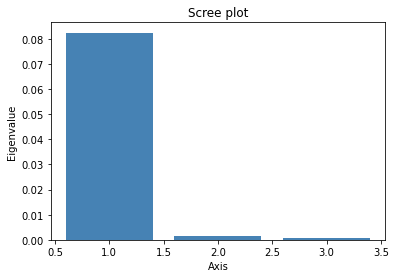

In [17]:
#affichage graphique des v.p.
afc.plot_eigenvalues()

We represent the individuals rows in the first factorial plane which restores 99.36% of the available information.

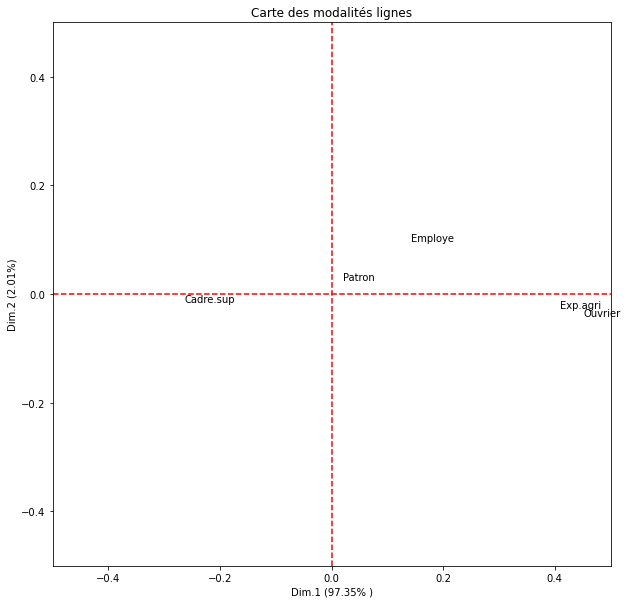

In [40]:
#affichage dans le premier plan factoriel
fig, ax = plt.subplots(figsize=(10,10))
ax.axis([-0.5,+0.5,-0.5,+0.5])
ax.plot([-0.5,+0.5],[0,0],color='red',linestyle='--')
ax.plot([0,0],[-0.5,+0.5],color='red',linestyle='--')
ax.set_xlabel("Dim.1 (97.35% )")
ax.set_ylabel("Dim.2 (2.01%)")
plt.title("Carte des modalités lignes")
for i in range(D.shape[0]):
 ax.text(afc.row_coord_[i,0],afc.row_coord_[i,1],D.index[i])

plt.show()

By placing the same scale on the abscissa and ordinate, we see that the differentiation of the line modalities is played out almost exclusively on the first factorial axis

Let us calculate the Euclidean distances in the 1st plane.

In [42]:
distPairesLigF1 = numpy.zeros(shape=(prof_lig.shape[0],prof_lig.shape[0]))
#double boucle
for i in range(prof_lig.shape[0]-1):
    for j in range(0,prof_lig.shape[0]):
        distPairesLigF1[i,j] = numpy.sum((afc.row_coord_[i,0]-afc.row_coord_[j,0])**2)

#affichage
print(pandas.DataFrame(distPairesLigF1,index=D.index,columns=D.index))

           Exp.agri    Patron  Cadre.sup   Employe   Ouvrier
Exp.agri   0.000000  0.152072   0.452704  0.071837  0.001711
Patron     0.152072  0.000000   0.080014  0.014869  0.186046
Cadre.sup  0.452704  0.080014   0.000000  0.163869  0.510079
Employe    0.071837  0.014869   0.163869  0.000000  0.095723
Ouvrier    0.000000  0.000000   0.000000  0.000000  0.000000


# Column analysis

In the same way as for row profiles, we can calculate the distances to the origin (represented by the column margin of the table in Figure 107), the weights (of the columns) and the inertias.

We first calculate the "average" profile of the sectors.

In [43]:
#profil marginal des filières
prof_marg_col = tot_lig/numpy.sum(tot_lig)
print(prof_marg_col)

[0.07980973 0.1519556  0.48229387 0.12341438 0.16252643]


Profiles by sector (column).

In [44]:
#tableau des profils colonnes
prof_col = numpy.apply_along_axis(arr=D.values,axis=0,func1d=lambda x:x/numpy.sum(x))
print(pandas.DataFrame(prof_col,index=D.index,columns=D.columns))

              Droit   Science  Medecine       Iut
Exp.agri   0.077745  0.102911  0.046067  0.151832
Patron     0.163265  0.142412  0.147413  0.162304
Cadre.sup  0.456754  0.415800  0.620836  0.206806
Employe    0.140914  0.138254  0.095677  0.141361
Ouvrier    0.161322  0.200624  0.090007  0.337696


For each sector, we form the distance to the origin

In [45]:
#distance**2 à l'orgine
distoCol = numpy.apply_along_axis(arr=prof_col,axis=0,func1d=lambda x:numpy.sum((x
-prof_marg_col)**2/prof_marg_col))

#affichage
print(pandas.DataFrame(distoCol,index=D.columns))

                 0
Droit     0.004738
Science   0.027168
Medecine  0.092792
Iut       0.414466


The sociological composition of IUT students is clearly different from the rest of the world. By comparing his profile with the marginal profile, we note an over-representation of the children of farmers and workers, and an under-representation senior executives.

calculate the weight of the majors.

In [46]:
#poids de chaque colonne
poidsCol = tot_col/numpy.sum(tot_col)
print(pandas.DataFrame(poidsCol,index=D.columns))

                 0
Droit     0.271934
Science   0.254228
Medecine  0.372886
Iut       0.100951


calculate the inertias.

In [24]:
#inertie
inertieCol = distoCol*poidsCol
print(pandas.DataFrame(inertieCol,index=D.columns))

                 0
Droit     0.001288
Science   0.006907
Medecine  0.034601
Iut       0.041841


The IUT and Medicine sectors are those that will weigh the most in the analysis, but not for the same reasons: the first because its distance to the origin is high, the second because it gathers a large number of students (weight).

In [25]:
#somme des inerties
print(numpy.sum(inertieCol))

0.08463685828547156


The sum of the inertias of the column modalities identical to the sum of the inertias of the row modalities (CSP). It is not a coincidence.

In AFC, rows and columns play symmetrical roles (duality).

we display the coordinates of the column modalities (the channels) for the 3 factors of the AFC on the data.

In [26]:
#coordonnées des filières
print(pandas.DataFrame(afc.col_coord_,index=D.columns))

                 0         1         2
Droit     0.027987  0.060669 -0.016545
Science   0.160462  0.002734  0.037583
Medecine -0.303125 -0.029662 -0.005200
Iut       0.640174 -0.060749 -0.030870


let's move on to the graphical representation in the plan.

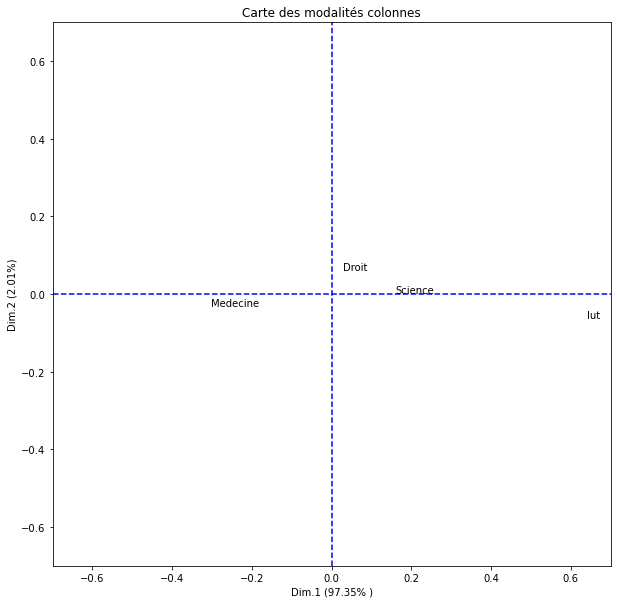

In [48]:

#affichage dans le premier plan factoriel
fig, ax = plt.subplots(figsize=(10,10))
ax.axis([-0.7,+0.7,-0.7,+0.7])
ax.plot([-0.7,+0.7],[0,0],color='blue',linestyle='--')
ax.plot([0,0],[-0.7,+0.7],color='blue',linestyle='--')
ax.set_xlabel("Dim.1 (97.35% )")
ax.set_ylabel("Dim.2 (2.01%)")
plt.title("Carte des modalités colonnes")

for i in range(D.shape[1]):
    ax.text(afc.col_coord_[i,0],afc.col_coord_[i,1],D.columns[i])
plt.show()

Once again, the differentiations are mainly based on the 1st factor.
The IUT visibly presents a separate profile, in contrast to that of "Medicine" in particular

# Analysis of the row-column association

we form the table of theoretical numbers:

In [49]:
#effectifs totaux
n = numpy.sum(D.values)
#tableau sous indépendance
E = numpy.dot(numpy.reshape(tot_lig,(5,1)),numpy.reshape(tot_col,(1,4)))/n
print(E)

[[ 82.12420719  76.7769556  112.6115222   30.48731501]
 [156.36231501 146.18128964 214.40935518  58.04704017]
 [496.28039112 463.9667019  680.51664905 184.23625793]
 [126.99339323 118.72463002 174.13768499  47.14429175]
 [167.23969345 156.35042283 229.32478858  62.08509514]]


We can calculate the test statistic and the critical probability:

In [29]:
#statistique du KHI-2
KHI2 = numpy.sum(((D.values-E)**2)/E)
print(KHI2)


320.2658717522244


In [30]:
#degré de liberté
ddl = (E.shape[0]-1)*(E.shape[1]-1)
print(ddl)


12


The p-value of the test.

In [31]:
print(1-scipy.stats.chi2.cdf(KHI2,ddl))


0.0


If the p-value is less than 0.05. This indicates strong evidence against the null hypothesis, as there is less than a 5% chance that the null value is correct (and the results are random). Therefore, we reject the null hypothesis.
Otherwise we keep the null hypothesis.
Therefore, the test leads to the rejection of the null hypothesis (p-value ≈ 0). Obviously, the parents' CSP variables and choice of pathways are strongly linked.

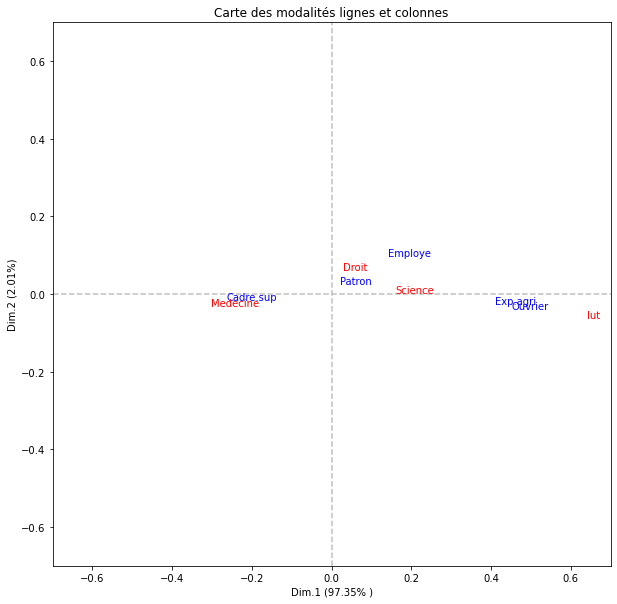

In [50]:
#représentation simultanée
fig, ax = plt.subplots(figsize=(10,10))
ax.axis([-0.7,+0.7,-0.7,+0.7])
ax.plot([-0.7,+0.7],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-0.7,+0.7],color='silver',linestyle='--')
ax.set_xlabel("Dim.1 (97.35% )")
ax.set_ylabel("Dim.2 (2.01%)")
plt.title("Carte des modalités lignes et colonnes")
#modalités ligne
for i in range(D.shape[0]):
 ax.text(afc.row_coord_[i,0],afc.row_coord_[i,1],D.index[i],color='blue')
#modalités colonne
for i in range(D.shape[1]):
 ax.text(afc.col_coord_[i,0],afc.col_coord_[i,1],D.columns[i],color='red')

plt.show()